# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования:

1. Определить рыночную стоимость объектов недвижимости;
2. Установить какие факторы влияют на ценобраование стоимости квартир.

    ## Ход исследования
    
    Данные о недвижимости я получу из файла `'/datasets/real_estate_data.csv'`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. 
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возомжность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы и присутплю к проведению исследовательского анализа. 
    
    Таким образом, мое исследование пройдет в несколько этапов:
    
    * Обзор данных;
    * Предобработка данных;
    * Расчеты и добавление результатов в таблицу;
    * Проведение анализа для Ленинградской области;
    * Проведение анализа для Санкт-Петербурга;
    * Различаются ли факторы, которые влияют на ценообразовании стоимости квартир;
    * Написание общего вывода.

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Предварительно открыв таблицу, я обнаружил, что данные в ней не разделены. Поэтому для корректного отображения данных использую разделитель **"sep"** с параметром табуляции **'\t'**

In [2]:
try:
    data = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/3_исследовательский_анализ/real_estate_data.csv', sep='\t')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


Выведу первые 5 строк таблицы, чтобы ознакомиться с дата фреймом.

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для наглядности,выведу **описание данных** дата фрейма

* **`airports_nearest`** — расстояние до ближайшего аэропорта в метрах (м)

* **`balcony`** — число балконов

* **`ceiling_height`** — высота потолков (м)

* **`cityCenters_nearest`** — расстояние до центра города (м)

* **`days_exposition`** — сколько дней было размещено объявление (от публикации до снятия)

* **`first_day_exposition`** — дата публикации

* **`floor`** — этаж

* **`floors_total`** — всего этажей в доме

* **`is_apartment`** — апартаменты (булев тип)

* **`kitchen_area`** — площадь кухни в квадратных метрах (м²)

* **`last_price`** — цена на момент снятия с публикации

* **`living_area`** — жилая площадь в квадратных метрах (м²)

* **`locality_name`** — название населённого пункта

* **`open_plan`** — свободная планировка (булев тип)

* **`parks_around3000`** — число парков в радиусе 3 км

* **`parks_nearest`** — расстояние до ближайшего парка (м)

* **`ponds_around3000`** — число водоёмов в радиусе 3 км

* **`ponds_nearest`** — расстояние до ближайшего водоёма (м)

* **`rooms`** — число комнат

* **`studio`** — квартира-студия (булев тип)

* **`total_area`** — общая площадь квартиры в квадратных метрах (м²)

* **`total_images`** — число фотографий квартиры в объявлении

Получим более детальную информацию о дата фрейме с помощью метода **"info"**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посчитаем пропущенные значения в дата фрейме

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверю наличие пропусков в данных

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Строим общую гистограмму дата фрейма

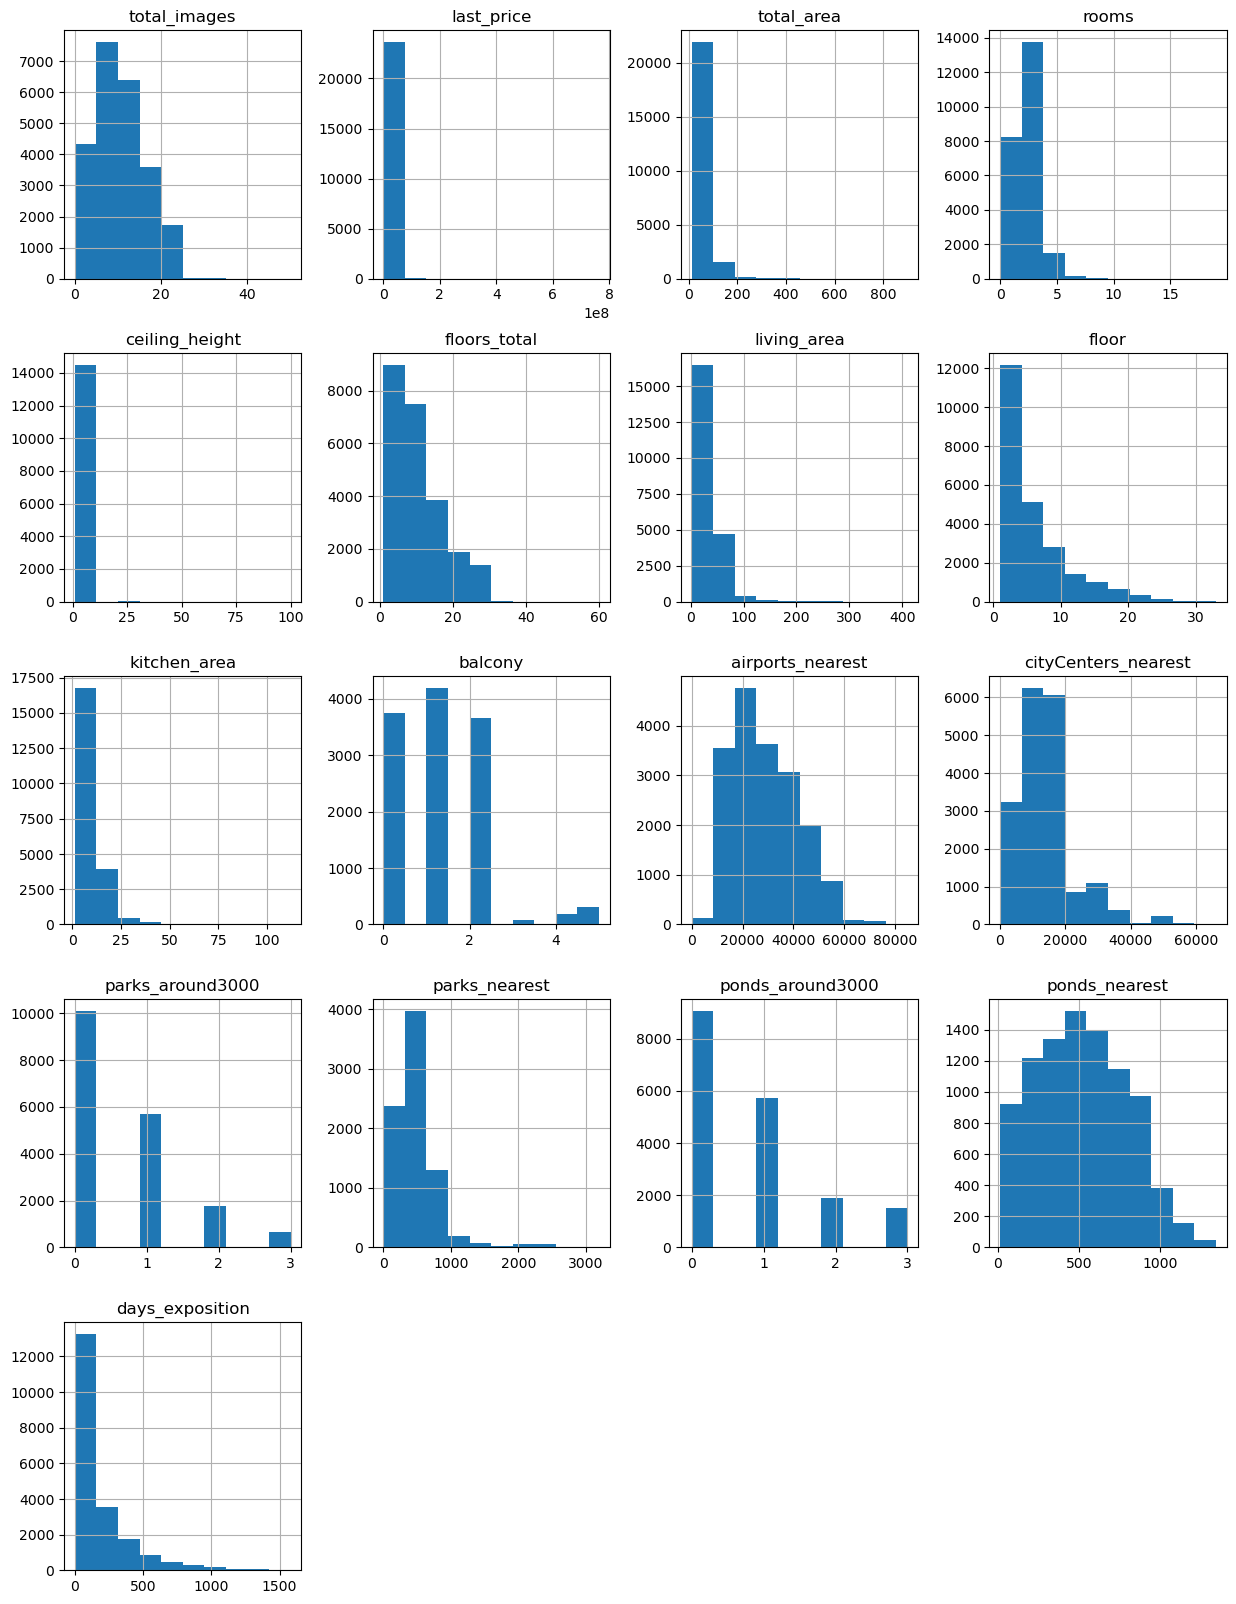

In [7]:
data.hist(figsize=(15, 20))
plt.show();

**Промежуточные выводы**: 

1. Привести к общему формату названия следующих колонок ("cityCenters_nearest", "parks_around3000", "ponds_around3000").
2. Колонку "first_day_exposition" привести в формат даты и времени.
3. Колонку "floors_total" привести к типу int.
4. Колонку "is_apartment" привести к булеву типу.
5. Колонку "balcony" привести к типу int.
6. Обработать пропущенные значения в дата фрейме.

**Общие гистограммы на данном этапе показывают следующее**:
1. В среднем, количество изображений квартир составляет около 10 шт. 
2. Ничего конкретного пока сказать нельзя по гистограме с последней ценой на квартиру. 
3. Площадь квартир ,в основном, составляет 100 кв.м., это является подавляющим большинством.
4. Больше всего квартир с 2-3 комнатами.
5. По высоте потолков однозначно ничего сказать нельзя. 
6. В большинстве объявлений квартиры продаются в домах с количеством этажей в 8-10.
7. В основном жилая площадь составляет около 50 кв.м., это является подавляющим большинством.
8. Подавляющее количество объявлений приходится на квартиры расположенные на 1-3 этаже.
9. У основной массы квартир размер кухни составляет около 12.5 кв.м.
10. Больше всего объявлений квартир у которых есть 1 балкон.  Количество квартир без балкона или с 2-мя балконами, примерно одинаковое.
11. Больше всего продается квартир, у которых расстояние до ближаешего аэропорта около 20 км. Так же много объявлений квартир с расстоянием до 10 км. и до 30 км. до ближайшего аэропорта. 
12. Подавляющеее большинство квартир располженны в диапазоне от 10 до 20 км. от центра города.
13. Значительное количество квартир не имеют парков в радиусе 3 км. 
14. Квартиры, у которых рядом находится парк, расстояние до этого парка в среднем составляет около 500 м. 
15. Больше всего квартир, которые не расположенны рядом с каким-либо водоемом. 
16. Квартиры, которые находятся рядом с водоемом6 их среднее расстояние составляет около 500 м. 
17. В среднем, объявление было размещено около 180-200 дней. 

### Предобработка данных

**Привожу названия колонок к общему формату.**

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'\
                           , 'parks_around3000' : 'parks_around_3000'\
                           , 'ponds_around3000' : 'ponds_around_3000'})

Проверяю результаты изменений.

In [10]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Привожу колонку "first_day_exposition" в удобный для чтения формат**

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверяю результат.

In [12]:
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


В колонке 'balcony', есть пропущенные значения NaN. Могу предположить, что незаполненные ячейки образовались из-за отсутствия балкона в квартире, поэтому лишний раз люди не акцентировали, в ходе заполнения заявления, на параметр укзывающий на балкон.

Меняю все NaN  на 0 и перевожу тип данных в 'int'

In [13]:
data['balcony'].isna().sum()

11519

In [14]:
data['balcony'] = data['balcony'].fillna(0)

In [15]:
data['balcony'] = data['balcony'].astype('int')

Проверяю результаты.

In [16]:
data['balcony'].isna().sum()

0

Пропущенных значений в колонке **'balcony'** нет, тип данных изменен на целые числа.

**Колонка 'is_apartment'**

В описании данных было указанно, что тип данных колонки 'is_apartment', должен быть булев.

Проверю количество пропущенных значений. Заполню их и изменю тип данных.

In [17]:
data['is_apartment'].isna().sum()

20924

Количество пропущенных значений составляет более **88%** от числа объявлений. Есть предположение, что пропуски появились из-за того, что у людей не апартаменты, а ,в основном, квартиры на продажу и эти данные лишний раз дублировать не захотели.

Заменяю пропуски на **False** и изменяю тип данных на булев. 

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверяю результаты.

In [19]:
data['is_apartment'].isna().sum()

0

Пропусков нет, тип данных изменен.

**Проверю пропуски и изменю тип данных в колонке 'floors_total' на 'int'**

In [20]:
data['floors_total'].isna().sum()

86

Очень незначительное количество пропусков. Скорей всего связанно с человеческим фактором, возможно, при заполнение анкеты просто забывали указать количество этажей в доме.

In [21]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')

Проверяю результаты.

In [22]:
data['floors_total'].isna().sum()

0

Пропусков нет, тип данных изменен.

**Обработка пустых значений в колонке 'ceiling_height'**

In [23]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Создам переменную с медианным значением высоты потолков и вставлю их вместо пропусков.  

In [24]:
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median

2.65

Заменяю пробелы медианным значением.

In [25]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

Проверяю результат.

In [26]:
data['ceiling_height'].isna().sum()

0

Все значения заменены, пропусков нет.

Проверю разброс значений в столбце.

In [27]:
data['ceiling_height'].agg(['min', 'max', 'mean', 'median'])

min         1.000000
max       100.000000
mean        2.724358
median      2.650000
Name: ceiling_height, dtype: float64

**Заполню пропуски в колонке 'living_area'** 

In [28]:
data['living_area'].isna().sum()

1903

Возможно пропуски появились из-за того, что пользователи не посчитали важным заполнять данную информацию.

In [29]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Создаю новую переменную и посчитаю среднюю жилую площадь. Затем заменю пропуски полученным значением.   

In [30]:
living_area_mean = (data['living_area'] / data['total_area']).mean()
living_area_mean

0.5647655216993298

In [31]:
data['living_area'] = data['living_area'].fillna(living_area_mean)

Проверяю результат

In [32]:
data['living_area'].isna().sum()

0

**Проработаю пропуски в колонке 'locality_name'**

In [33]:
data['locality_name'].isna().sum()

49

Т.к. количество пропусков в колонке 'locality_name' меньше 5-10%, я решил их удалить, дабы сэкономить время. Удаление никак не повлияет на ход дальнейшего исследования.

In [34]:
data = data.dropna(subset=['locality_name'])

Проверяю результат.

In [35]:
data['locality_name'].isna().sum()

0

**Проработаю пропуски в колонке 'kitchen_area'**

In [36]:
data['kitchen_area'].isna().sum()

2269

Заполню пропуски нулевыми значениями. После посичтаю среднее значение в новой переменной и заменю нулевые значения на средние в заданном мной диапазоне.

In [37]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [38]:
data['kitchen_area'].describe()

count    23650.000000
mean         9.552654
std          6.416640
min          0.000000
25%          6.300000
50%          9.000000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64

Вычисляю среднее значение квадратажа кухни от 5 до 15 м.

In [39]:
kitchen_area_exchange = round(data.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].mean(), 2)

In [40]:
kitchen_area_exchange

7.96

**Заменяю нулевые значения на средние из новой переменной**

In [41]:
data.loc[data['kitchen_area'] <= 5, 'kitchen_area'] = kitchen_area_exchange

In [42]:
data['kitchen_area'].isna().sum()

0

In [43]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.378623
std          5.619207
min          5.040000
25%          7.700000
50%          9.000000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64

Уберу выбросы, которые больше 15 кв.м.

In [44]:
new_kitchen_area = data.loc[data['kitchen_area'] <= 15]

In [45]:
new_kitchen_area['kitchen_area'].describe()

count    21264.000000
mean         8.995272
std          2.386071
min          5.040000
25%          7.200000
50%          8.390000
75%         10.500000
max         15.000000
Name: kitchen_area, dtype: float64

In [46]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Посмотрю какие квартиры находятся на минимальном расстоянии от ближайшего аэропорта**

In [47]:
data['airports_nearest'].min()

0.0

In [48]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Одна строчка. Похоже на ошибку. Уберу этот вариант, чтобы можно было посмотреть объективно на показатели.

In [49]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [50]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Ошибка исправлена. Еще раз смотрю ближайшие квартиры к аэропорту.

In [51]:
data['airports_nearest'].min()

6450.0

Ближайшая квартира, находится в **6450** метрах от аэропорта. Исходя из этого, пропуски в **'airports_nearest'** заменю нулями, т.к. рядом с этими квартирами нет аэропорта.

In [52]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'].isna().sum()

0

**Проработаю пропуски в колонке 'parks_around_3000'** 

Изначально узнаю количество уникальных значений.

In [53]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [54]:
data['parks_around_3000'].describe()

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Количество парков от 1 до 3. Так же, есть значение NaN. Можем сделать вывод, что в ячейках со значением NaN решили ничего не заполнять, т.к. поблизости нет парков. Следовательно, меняю пропущеные значение на 0 и изменю тип данных на **'int'**.

In [55]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['parks_around_3000'].isna().sum()

0

**Обработаю пропуски в колонке 'parks_nearest'**

In [56]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Посчитаю среднее значение расстояния, которое больше 3000 и вставлю это значение в пропуски. 

In [57]:
parks_nearest_mean = data.query('parks_nearest > 3000')['parks_nearest'].mean()
parks_nearest_mean

3114.25

In [58]:
data['parks_nearest'] = data['parks_nearest'].fillna(parks_nearest_mean)
data['parks_nearest'].isna().sum()

0

**Обработаю колонку 'ponds_around_3000'**

In [59]:
data['ponds_around_3000'].isna().sum()

5510

Пропусков не так много. Скорей всего это связанно с тем, что рядом нет водоемов, эти цифры вызывают доверие. Поэтому пропуски заменю на нулевые значения и изменю тип данных на **'int'**

In [60]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['ponds_around_3000'].isna().sum()

0

**Пропуски в колонке 'ponds_nearest'**

In [61]:
data['ponds_nearest'].isna().sum()

14565

Вероятно, присутствие пропусков означает то, что рядом нет водоемов на расстоянии ближе, чем 3000 м.  Поэтому заменю пропуски на 0.

In [62]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'].isna().sum()

0

**Пропуски в колонке 'city_centers_nearest'**

In [63]:
data['city_centers_nearest'].isna().sum()

5511

Пропуски в колонке 'city_centers_nearest' решил оставить все как есть, т.к. замена медианным значением была бы нецелесообразна.

**Пропуски в колонке 'days_exposition'** 

In [64]:
data['days_exposition'].isna().sum()

3180

Скорей всего количество пропусков связано с тем, что объявление не было снято с продажи. Поэтому пропуски оставляю как есть.

In [65]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    5511
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3180
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Устраняю неявные дубликаты в населенных пунктах.

In [67]:
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Исправлю неявные дубликаты.

In [68]:
def category_locality_name(row):
    if 'Янино-1' in row:
        return 'городской посёлок Янино-1'
    elif 'Мурино' in row:
        return 'посёлок Мурино'
    elif 'Кудрово' in row:
        return 'деревня Кудрово'
    elif 'Красный Бор' in row:
        return 'посёлок городского типа Красный Бор'
    elif 'Фёдоровское' in row:
        return 'Фёдоровское'
    elif 'Лебяжье' in row:
        return 'посёлок городского типа Лебяжье'
    elif 'Кузьмоловский' in row:
        return 'посёлок городского типа Кузьмоловский'
    elif 'Аннино' in row:
        return 'посёлок Аннино'
    elif 'Новый Свет' in row:
        return 'посёлок Новый Свет'
    elif 'Никольское' in row:
        return 'село Никольское'
    elif 'Бугры' in row:
        return 'посёлок Бугры'
    elif 'Рощино' in row:
        return 'посёлок городского типа Рощино'
    elif 'Лесогорский' in row:
        return 'поселок городского типа Лесогорский'
    elif 'Петровское' in row:
        return 'посёлок Петровское'
    elif 'Щеглово' in row:
        return 'посёлок Щеглово'
    elif 'Мичуринское' in row:
        return 'посёлок Мичуринское'
    elif 'Вещево' in row:
        return 'посёлок при железнодорожной станции Вещево'
    elif 'Токсово' in row:
        return 'посёлок городского типа Токсово'
    elif 'Старая Малукса' in row:
        return 'посёлок Старая Малукса'
    elif 'Калитино' in row:
        return 'поселок Калитино'
    elif 'Приладожский' in row:
        return 'поселок городского типа Приладожский'
    elif 'Пансионат Зелёный Бор' in row:
        return 'посёлок Пансионат Зелёный Бор'
    elif 'Рабитицы' in row:
        return 'поселок Рабитицы'
    elif 'Лесное' in row:
        return 'поселок Лесное'
    elif 'Павлово' in row:
        return 'село Павлово'
    elif 'Победа' in row:
        return 'Победа'
    elif 'Терволово' in row:
        return 'Терволово'
    elif 'Советский' in row:
        return 'Советский'
    elif 'Вырица' in row:
        return 'Вырица'
    elif 'Тельмана' in row:
        return 'Тельмана'
    elif 'Большая Ижора' in row:
        return 'Большая Ижора'
    elif 'Рахья' in row:
        return 'Рахья'
    elif 'Зимитицы' in row:
        return 'Зимитицы'
    elif 'Свердлова' in row:
        return 'Свердлова'
    elif 'Рябово' in row:
        return 'Рябово'
    elif 'Поляны' in row:
        return 'Поляны'
    elif 'Мга' in row:
        return 'Мга'
    elif 'Ильичёво' in row:
        return 'Ильичёво'
    elif 'Гаврилово' in row:
        return 'Гаврилово'
    elif 'Назия' in row:
        return 'Назия'
    elif 'Гарболово' in row:
        return 'Гарболово'
    elif 'Приветнинское' in row:
        return 'Приветнинское'
    elif 'Мельниково' in row:
        return 'Мельниково'
    elif 'Усть-Луга' in row:
        return 'Усть-Луга'
    elif 'Любань' in row:
        return 'Любань'
    elif 'Стеклянный' in row:
        return 'Стеклянный'
    elif 'Форносово' in row:
        return 'Форносово'
    elif 'Сумино' in row:
        return 'Сумино'
    elif 'Возрождение' in row:
        return 'Возрождение'
    elif 'Лисий Нос' in row:
        return 'Лисий Нос'
    elif 'Жилгородок' in row:
        return 'Жилгородок'
    elif 'Громово' in row:
        return 'Громово'
    elif 'Коробицыно' in row:
        return 'Коробицыно'
    elif 'Кобралово' in row:
        return 'Кобралово'
    elif 'Перово' in row:
        return 'Перово'
    else:
        return row

In [69]:
data['locality_name'] = data['locality_name'].apply(category_locality_name)

Заменю все на нижний регистр и поменяю все "ё" на "е".

In [70]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [71]:
data['locality_name'].describe()

count               23650
unique                305
top       санкт-петербург
freq                15721
Name: locality_name, dtype: object

**Столбец `'last_price'`**

In [72]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [73]:
data['last_price'] = round(data['last_price'], 0)

In [74]:
data['last_price'] = data['last_price'].astype('int64')

In [75]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [76]:
data.loc[73]

total_images                             10
last_price                          4750000
total_area                             73.8
first_day_exposition    2016-03-14 00:00:00
rooms                                     3
ceiling_height                         2.65
floors_total                             10
living_area                            44.8
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           10.4
balcony                                   0
locality_name             поселок парголово
airports_nearest                    53817.0
city_centers_nearest                23742.0
parks_around_3000                         0
parks_nearest                       3114.25
ponds_around_3000                         3
ponds_nearest                         631.0
days_exposition                       166.0
Name: 73, dtype: object

**Аномалии в колонке `'ceiling_height'`**

Посчитаю количество уникальных значений

In [77]:
round(data['ceiling_height'], 0).value_counts()

3.0      19630
2.0       3586
4.0        390
5.0          9
27.0         8
25.0         7
6.0          4
8.0          4
32.0         2
1.0          2
23.0         1
10.0         1
28.0         1
24.0         1
20.0         1
14.0         1
26.0         1
100.0        1
Name: ceiling_height, dtype: int64

Данные показывают на то, что пользователи могли ошибиться с разделяющим знаком. Суммарно аномалий не так много. Однако эти данные будут влиять своими выбивающимися значениями при проведения анализа и построения графиков.

Принимаю решение изменить аномальные значения на медианный показатель высоты потолков. Т.к. аномальных значений не так много, то считаю данный метод целесообразным, даже, если по факту высота потолка 3.2 м. и будет замена на медианное значение, это никак не скажется на эффективный анализ данных.

In [78]:
ceil = (data.loc[(data['ceiling_height'] <= 10) | (data['ceiling_height'] >= 2.4), \
                 'ceiling_height']).median()

In [79]:
ceil

2.65

In [80]:
data.loc[(data['ceiling_height'] >= 4) | (data['ceiling_height'] <= 1.9),'ceiling_height'] = ceil

In [81]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.690939
std          0.197388
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

**Проверка на явные дубликаты**

In [82]:
data.duplicated().sum()

0

Явные дубликаты не обнаруженны.

#### Выводы

1. Произведена первичная оценка общих гистрограм дата фрейма.

2. Были отредактированы и подведены под один формат названия столбцов в таблице.

3. Произведена работа с пропусками в таблице, чтобы можно было удобней работать с анализом данных.

4. Так же колонки были переведены ф формат соответствующий значениям.

5. Исправлены неявные дубликаты в колонке "locality_name".

## Посчитайте и добавьте в таблицу новые столбцы

**Добавляю в таблицу столбцы (день, месяца, год)**

In [83]:
data['day_of_publication'] = data['first_day_exposition'].dt.dayofweek
data['month_of_publication_id'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [84]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_of_publication,month_of_publication_id,year_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1,482.00,2,755.0,NaN,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12817.0,18603.0,0,3114.25,0,0.0,81.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21741.0,13933.0,1,90.00,2,574.0,558.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,0.564766,9,False,...,28098.0,6800.0,2,84.00,3,234.0,424.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2,112.00,1,48.0,121.0,1,6,2018


**Посчитаю и добавлю в таблицу цену одного квадратного метра**

In [85]:
data['square_price'] = data['last_price'] / data['total_area']
data['square_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: square_price, Length: 23650, dtype: float64

Переведу значения столбца **'square_price'** в формат 'int', для более удобного прочтения показателей.

In [86]:
data['square_price'] = data['square_price'].astype('int')
data['square_price']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: square_price, Length: 23650, dtype: int64

In [87]:
round(data['square_price'].mean(), 2)

99431.8

В среднем, цена за квадратный метр, составляет около 100 тыс. руб.

**Создам функцию для посчета типа этажа квартиры (значения — «первый», «последний», «другой») и добавлю данную категоризацию в исходную таблицу.**

In [88]:
def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [89]:
data['floors_type'] = data.apply(floors_type, axis=1)

In [90]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_of_publication,month_of_publication_id,year_of_publication,square_price,floors_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482.00,2,755.0,NaN,3,3,2019,120370,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0,3114.25,0,0.0,81.0,1,12,2018,82920,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,1,90.00,2,574.0,558.0,3,8,2015,92785,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,0.564766,9,False,...,2,84.00,3,234.0,424.0,4,7,2015,408176,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112.00,1,48.0,121.0,1,6,2018,100000,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,0,3114.25,0,0.0,55.0,0,9,2018,95065,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0,3114.25,0,0.0,155.0,3,11,2017,99195,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,0.564766,22,False,...,0,3114.25,0,0.0,NaN,3,4,2019,110544,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,0,3114.25,0,0.0,189.0,2,5,2018,87454,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0,3114.25,0,0.0,289.0,6,2,2017,88524,другой


**Посчитаю и добавлю в таблицу колонку с расстоянием до центра города в км.**

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23650 non-null  int64         
 1   last_price               23650 non-null  int64         
 2   total_area               23650 non-null  float64       
 3   first_day_exposition     23650 non-null  datetime64[ns]
 4   rooms                    23650 non-null  int64         
 5   ceiling_height           23650 non-null  float64       
 6   floors_total             23650 non-null  int64         
 7   living_area              23650 non-null  float64       
 8   floor                    23650 non-null  int64         
 9   is_apartment             23650 non-null  bool          
 10  studio                   23650 non-null  bool          
 11  open_plan                23650 non-null  bool          
 12  kitchen_area             23650 n

In [92]:
data['city_centers_distance_km'] = round(data['city_centers_nearest']/1000)

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_of_publication,month_of_publication_id,year_of_publication,square_price,floors_type,city_centers_distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.00,2,755.0,NaN,3,3,2019,120370,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,3114.25,0,0.0,81.0,1,12,2018,82920,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.00,2,574.0,558.0,3,8,2015,92785,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,0.564766,9,False,...,84.00,3,234.0,424.0,4,7,2015,408176,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.00,1,48.0,121.0,1,6,2018,100000,другой,8.0


### Проведите исследовательский анализ данных

**Построю график для изучения общей площади**

In [94]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

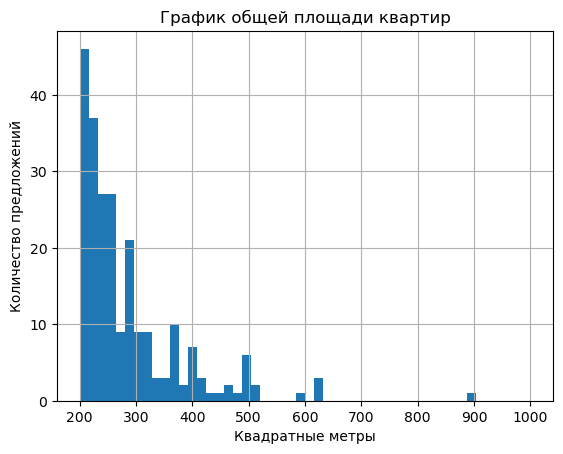

In [95]:
data['total_area'].hist(bins=50,  range=(200, 1000))

plt.title('График общей площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

Присутвуют выбросы от 400 до 900 кв.м. Создам новую переменную, удалю лишнее и оставлю значения в диапазоне до 250 кв.м., т.к. в эти рамки входит большинство объявлений , по которым будут более информативные показатели.  

In [96]:
data_new_area_total = data.loc[data['total_area'] <= 250]

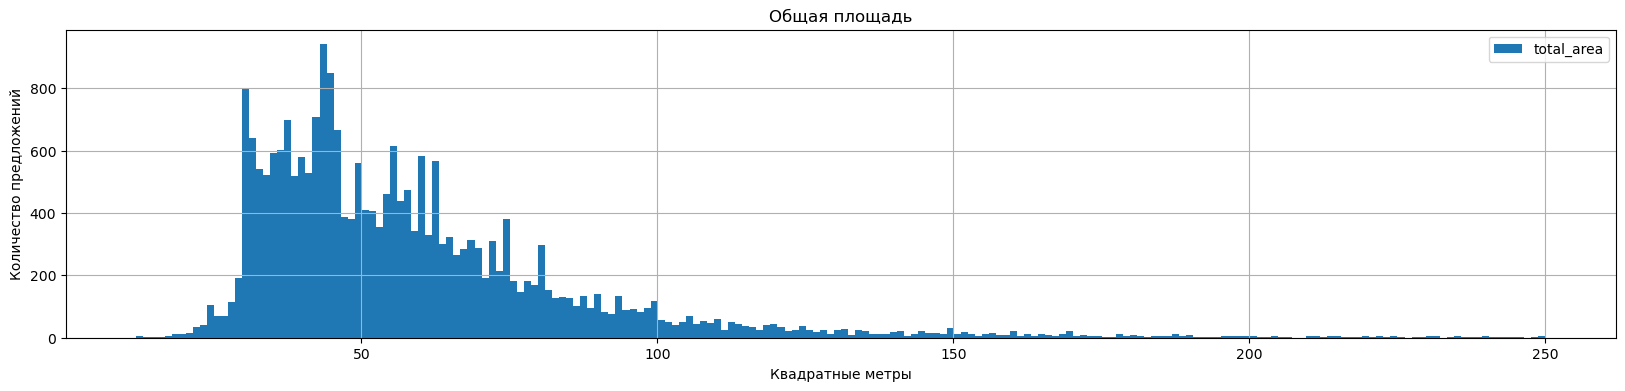

In [97]:
data_new_area_total.plot(kind='hist', title='Общая площадь', y='total_area', \
                         bins=200, grid=True, figsize=(20,4))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

После обновленной гистограммы, я решил оставить квартиры с площадью до 100 кв.м., т.к. это является основным массивом объявлений.
Повторю операцию с фильтрацией значений и построю новую гистограмму.

Сокращю range, чтобы увидеть пиковые показатели.

In [98]:
data_new_area_total = data.loc[data['total_area'] <= 100]

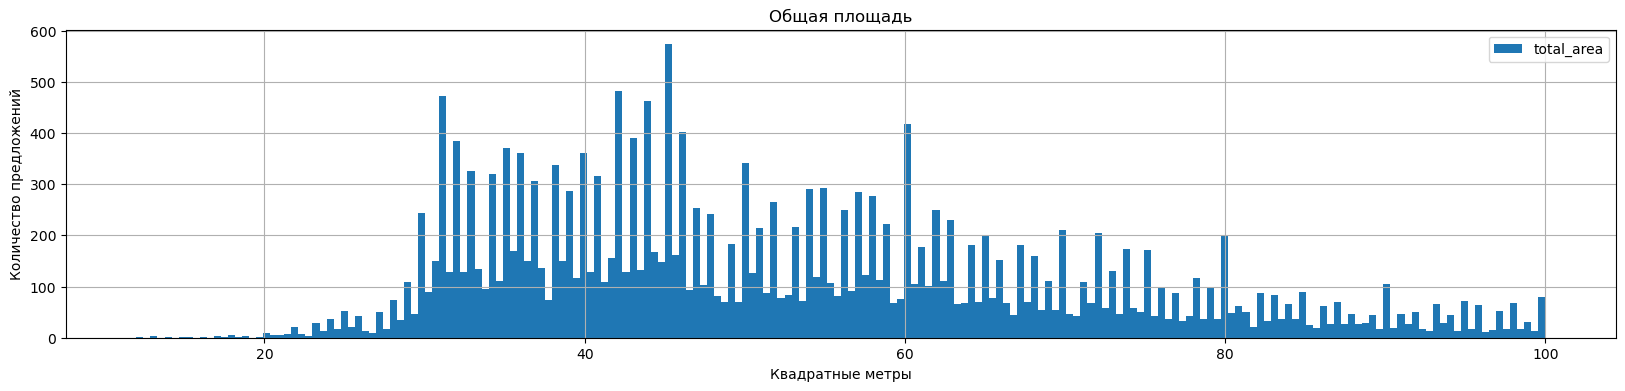

In [99]:
data_new_area_total.plot(kind='hist', title='Общая площадь', y='total_area', \
                         bins=200, grid=True, figsize=(20,4))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

Получился хороший наглядный график, по которому можно сделать вывод, что ,в основном, в продаже квартиры с общей площадью от 30 до 60 квадратных метров.

**Построю график для изучения жилой площади**

In [100]:
data['living_area'].describe()

count    23650.000000
mean        31.729072
std         23.052750
min          0.564766
25%         17.800000
50%         29.000000
75%         41.037500
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

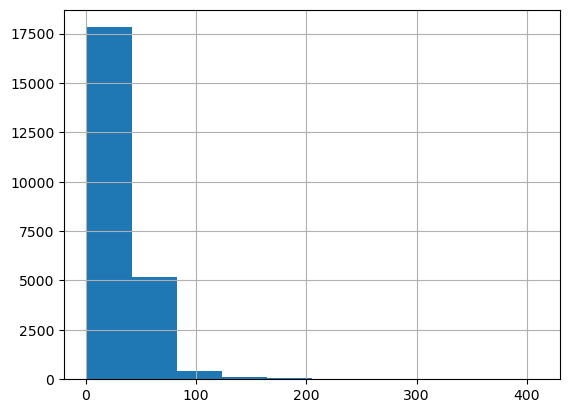

In [101]:
data['living_area'].hist()

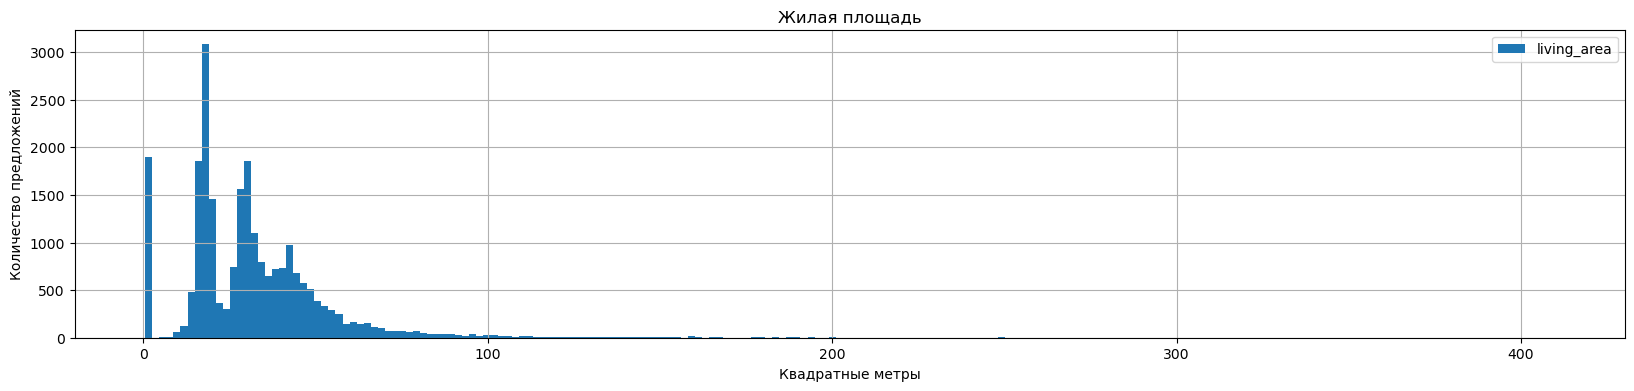

In [102]:
data.plot(kind='hist', title='Жилая площадь', y='living_area', \
          bins=200, grid=True, figsize=(20,4))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

Присутвуют выбросы в районе нуля. Для исследования буду брать диапозон от 17 до 40 кв.м. Для этого создам новую переменную.

In [103]:
data_new_living_area = data.loc[(data['living_area'] >= 17) & (data['living_area'] <= 40)]

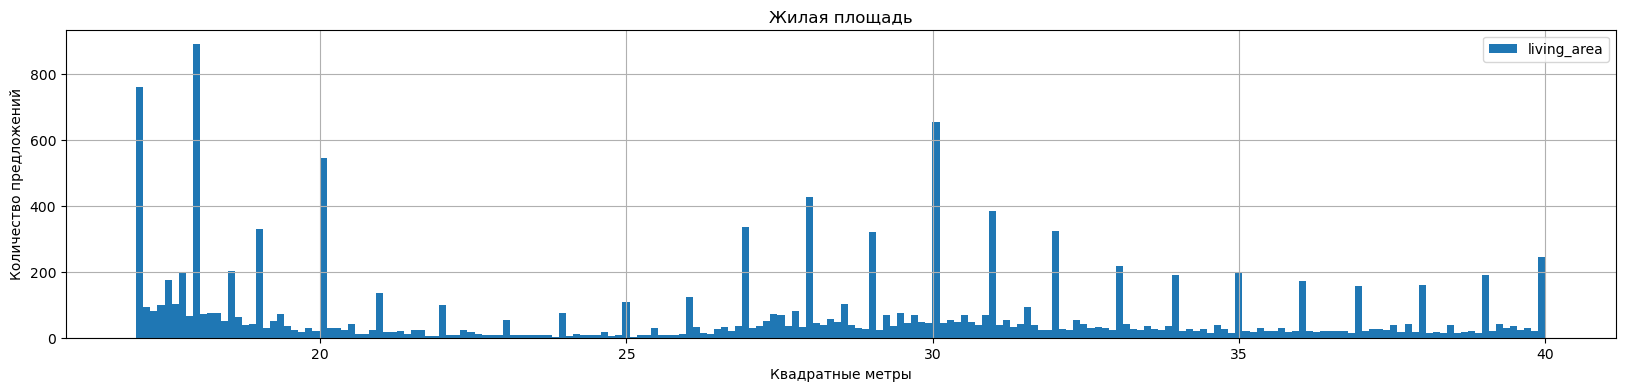

In [104]:
data_new_living_area.plot(kind='hist', title='Жилая площадь', y='living_area', \
                          bins=200, grid=True, figsize=(20,4))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

Можно увидеть большое кол-во объявлений в диапазоне от 17 до 20 кв.м., а также от 27 до 33 кв.м.

**Построю график для изучения площади кухни**

In [105]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.378623
std          5.619207
min          5.040000
25%          7.700000
50%          9.000000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64

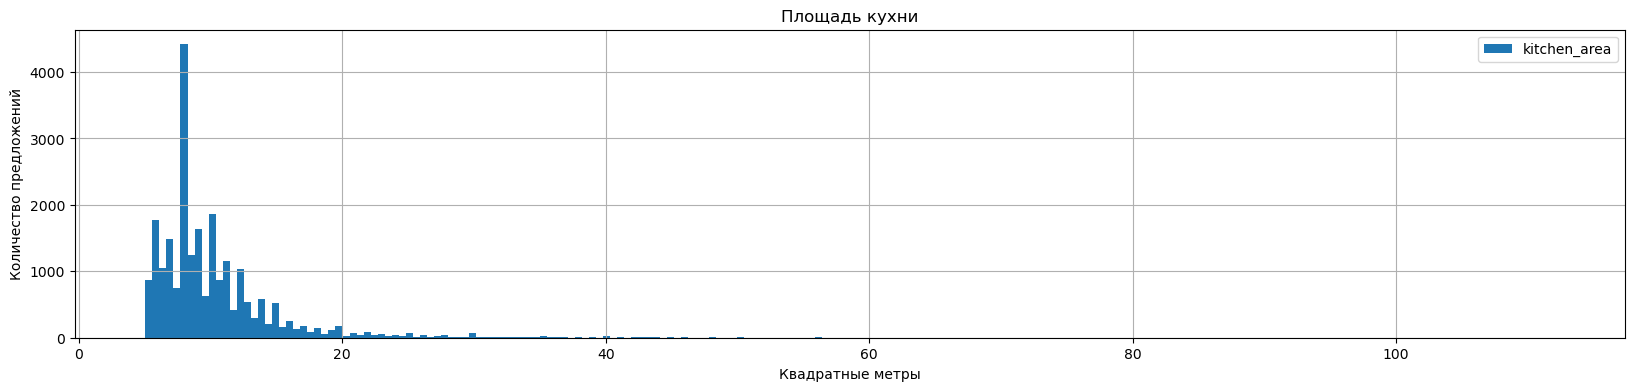

In [106]:
data.plot(kind='hist', title='Площадь кухни', y='kitchen_area', \
          bins=200, grid=True, figsize=(20,4))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

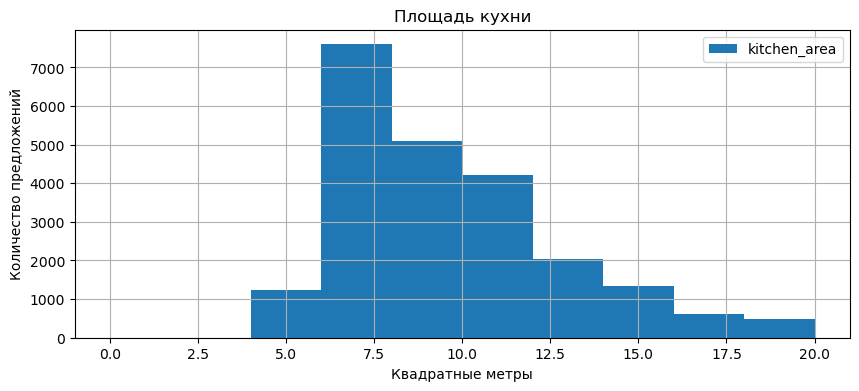

In [107]:
data.plot(kind='hist', title='Площадь кухни', y='kitchen_area', \
          bins=10, grid=True, figsize=(10,4), range=(0, 20))

plt.xlabel('Квадратные метры')
plt.ylabel('Количество предложений')
plt.show()

Основной массив кухонь в диапазоне от 6 до 10 кв.м.

**Изучу цены на момент снятия объявлений о продаже**

In [108]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

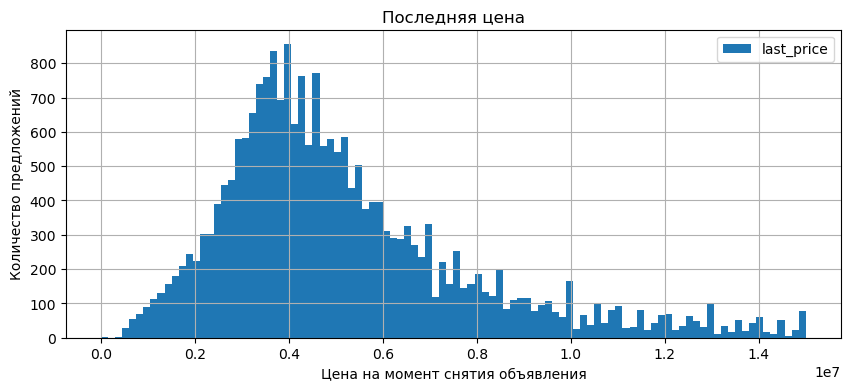

In [109]:
data.plot(y='last_price', title='Последняя цена', kind='hist', bins=100, \
          grid=True, range=(0,15000000), figsize = (10,4))

plt.xlabel('Цена на момент снятия объявления')
plt.ylabel('Количество предложений')
plt.show()

На графике видно, что основной пик предложений в районе 4 млн. Выведу на экран значения, до 6 млн.

In [110]:
data_last_price_filtered = data.query('last_price <= 6000000')

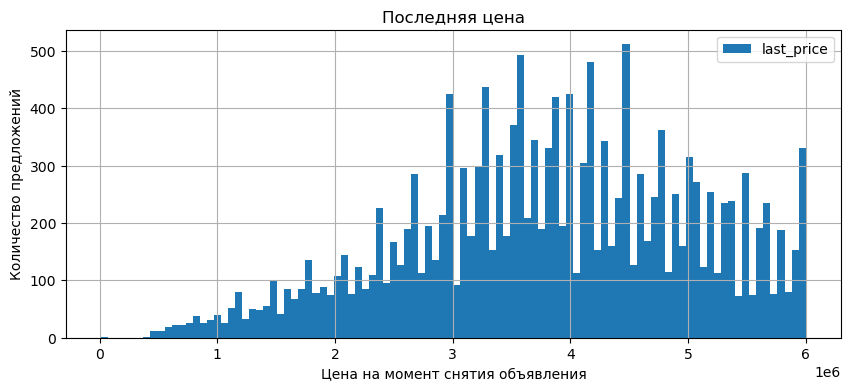

In [111]:
data_last_price_filtered.plot(y='last_price', title='Последняя цена', \
                              kind='hist', bins=100, grid=True, figsize=(10,4))

plt.xlabel('Цена на момент снятия объявления')
plt.ylabel('Количество предложений')
plt.show()

**Изучу данные по количествуу комнат**

In [112]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

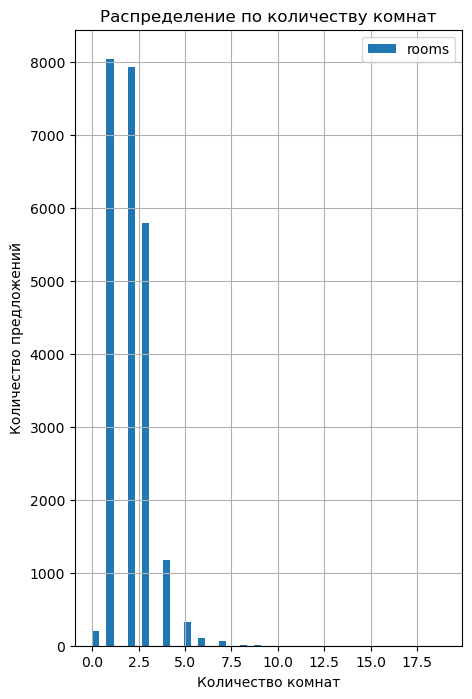

In [113]:
data.plot(kind='hist',y='rooms',title='Распределение по количеству комнат', \
          grid=True, bins=50, figsize=(5,8))

plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

В основном в объявлениях 1, 2-х и 3-х комнатные квартиры.

**Изучу данные по высоте потолков**

In [114]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.690939
std          0.197388
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

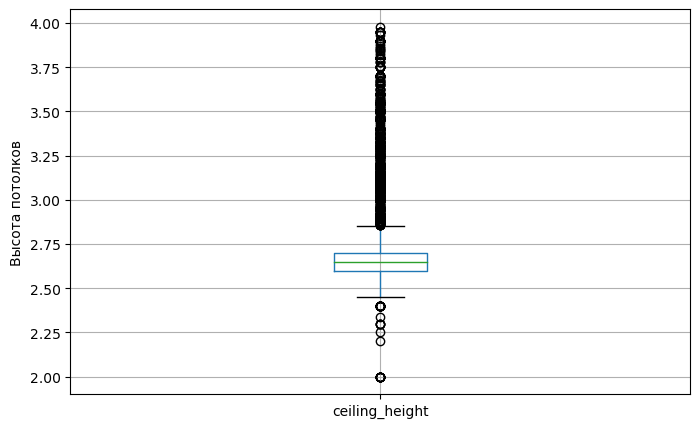

In [115]:
data.boxplot(column=['ceiling_height'], figsize=(8,5), grid=True)

plt.ylabel('Высота потолков')
plt.show()

Есть выбросы по данным и аномальные значения. Создам новую переменную с более реальным массивом высоты потолков и построю на ее основании график.

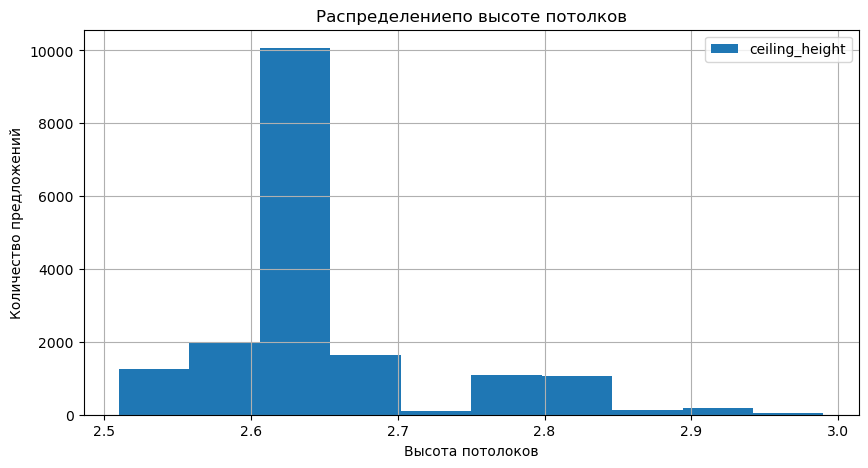

In [116]:
data_new_ceiling_height = data.query('ceiling_height < 3 and ceiling_height > 2.5')
data_new_ceiling_height.plot(kind='hist',y='ceiling_height',grid=True, \
                             bins=10, figsize=(10,5),title='Распределениепо высоте потолков')

plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

Основной массив объявлений в диапазоне от 2.6 до 2.7 м. График выглядит правдоподобным.

**Изучу данные по этажам квартир**

In [117]:
data['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

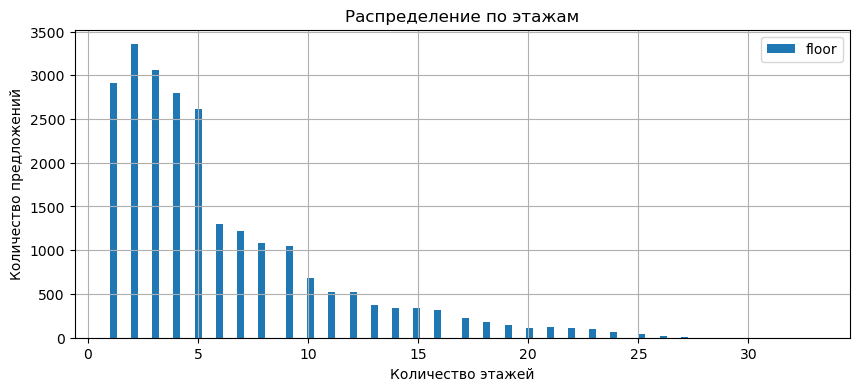

In [118]:
data.plot(kind='hist', title='Распределение по этажам', y='floor', \
          bins=100, grid=True, figsize=(10,4))

plt.xlabel('Количество этажей')
plt.ylabel('Количество предложений')
plt.show()

Очевидно большое количество объявлений по продаже квартир с 1 по 5 этаж. Менее массивный, но так же важный показатель по количеству объявлений с 5 по 10 этаж. Есть теория, что в большинстве своем, продаются квартиры в старых 5-и этажных домах.

**Изучу данные по типу этажа квартиры («первый», «последний», «другой»)**

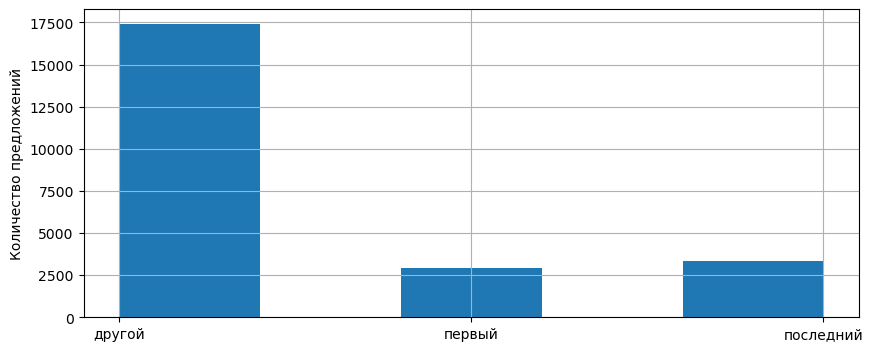

In [119]:
data['floors_type'].hist(bins=5, grid=True, figsize=(10,4))

plt.ylabel('Количество предложений')
plt.show()

На графике видно, что квартиры на первом и последнем этаже составляют около 30% от общего количества объявлений.

**Изучу данные по общему количеству этажей в доме**

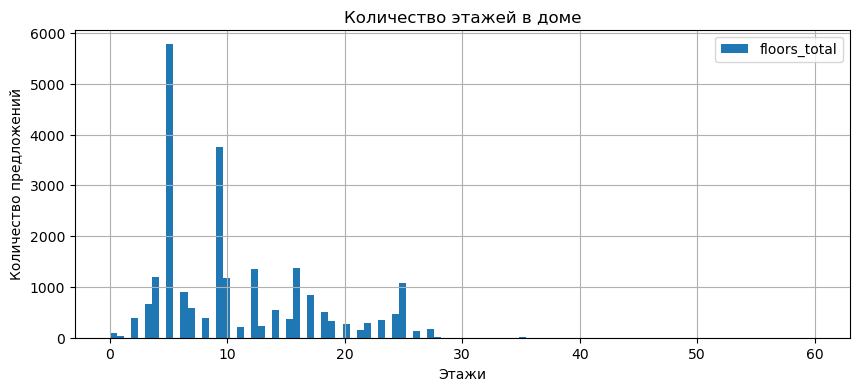

In [120]:
data.plot(kind='hist', title='Количество этажей в доме', y='floors_total', \
          bins=100, grid=True, figsize=(10,4))

plt.xlabel('Этажи')
plt.ylabel('Количество предложений')
plt.show()

Теория о продажах квартир подтвердилась. Основные продажи в старых 5-и этажках. Очевидно, что остальной массив объявлений приходится на многоэтажные и более современные дома.

**Изучу данные расстояния до центра города в метрах**

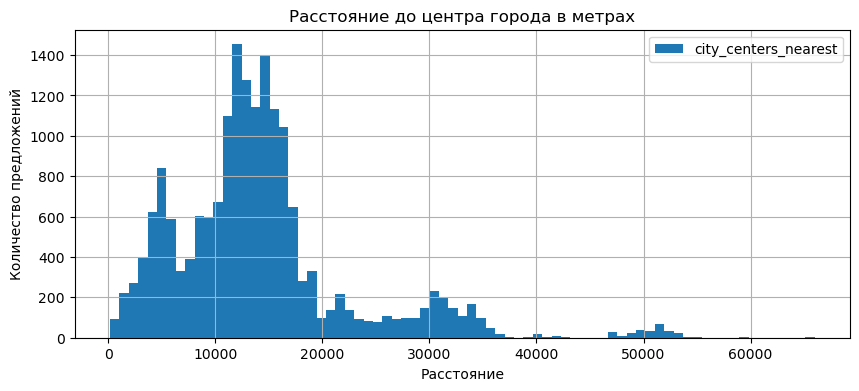

In [121]:
data.plot(kind='hist', title='Расстояние до центра города в метрах', \
          y='city_centers_nearest', bins=75, grid=True, figsize=(10,4))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

Большинство значений приходятся на расстояние до 20000м. Выведу этот показатель в новом графике.

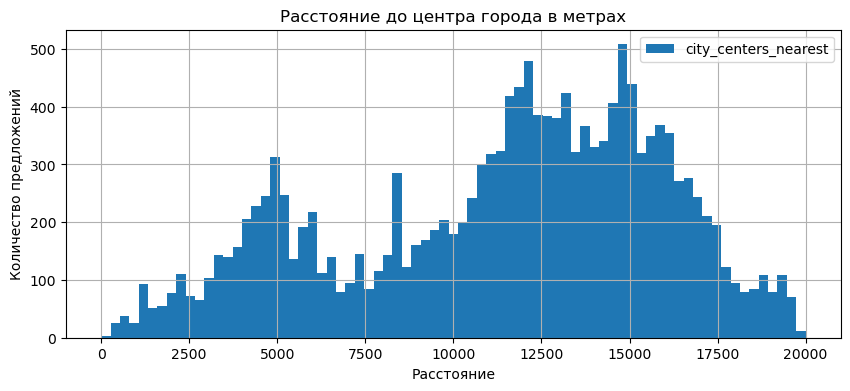

In [122]:
data.plot(kind='hist', title='Расстояние до центра города в метрах', \
          y='city_centers_nearest', bins=75, grid=True, figsize=(10,4), range=(0, 20000))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

Прогуглив расстояние от центра Санкт-Петербурга до КАДа, которое равняется около 16 км., можно сделать вывод, что, в основном, квартиры продаются ближе к окраине, но в пределах города, что так же может влиять на итоговуую стоимость квартиры. В добавок, данный график объясняет обилие объявлений в 5-и этажных домах.

**Изучу данные расстояния до ближайшего аэропорта в метрах**

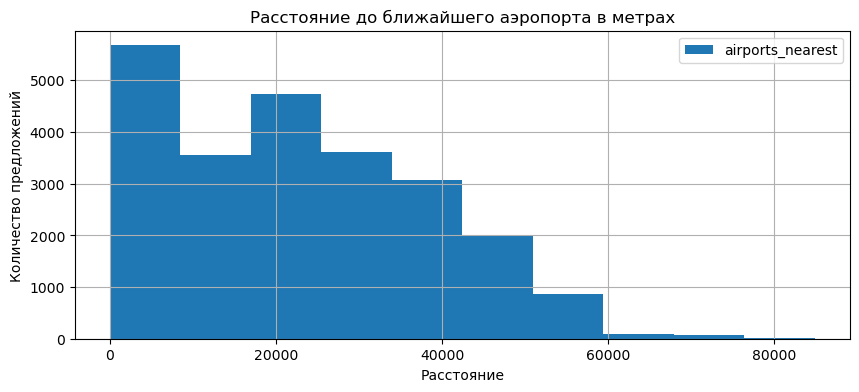

In [123]:
data.plot(kind='hist', title='Расстояние до ближайшего аэропорта в метрах', \
         y='airports_nearest', grid=True, figsize=(10,4))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

In [124]:
data['airports_nearest'].describe()

count    23650.000000
mean     22063.392812
std      16463.306970
min          0.000000
25%      10147.000000
50%      21868.000000
75%      34358.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В ходе обработки данных, я выяснил, что ближайшая квартира расположена на расстоянии в 6450м. от аэропорта. Пустые значения были заменены на 0. Поэтому в графике буду брать минимальное значение в 6000м. Также, на графике видно, что основной массив объявлений приходится на расстояние до 40000м.

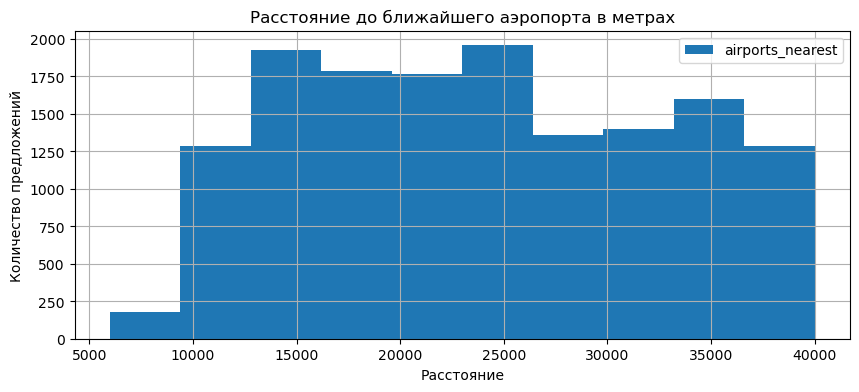

In [125]:
data.plot(kind='hist', title='Расстояние до ближайшего аэропорта в метрах', \
         y='airports_nearest', grid=True, figsize=(10,4), range=(6000, 40000))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

**Изучу данные расстояния до ближайшего парка в метрах**

In [126]:
data['parks_nearest'].describe()

count    23650.000000
mean      2219.736131
std       1259.604262
min          1.000000
25%        601.000000
50%       3114.250000
75%       3114.250000
max       3190.000000
Name: parks_nearest, dtype: float64

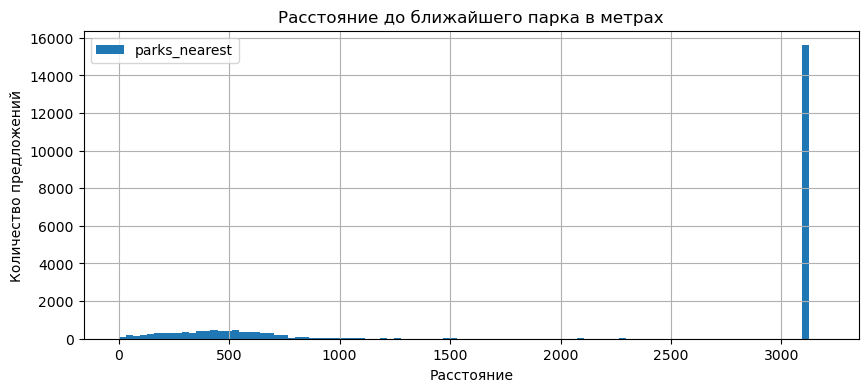

In [127]:
data.plot(kind='hist', title='Расстояние до ближайшего парка в метрах', \
         y='parks_nearest', bins=100, grid=True, figsize=(10,4))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

Из-за большого количества пропусков и ,вставленных мной в эти пропуски медианных значений, по графику видим значительный выброс с ближайшим расстоянием до парка более 3000м. Выведу данные с наиболее высоким диапазоном показателей.

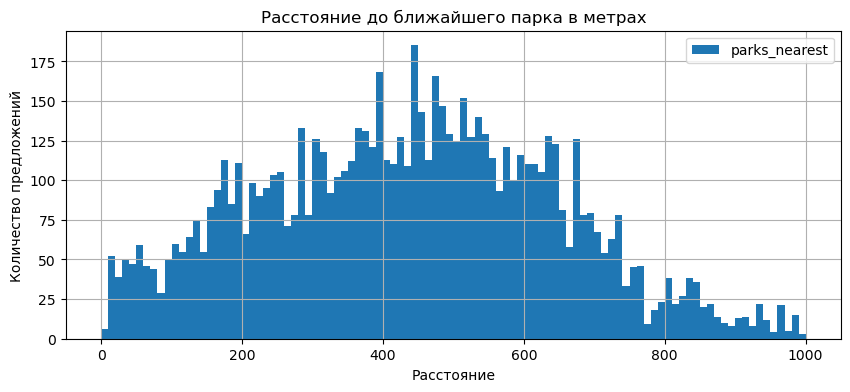

In [128]:
data.plot(kind='hist', title='Расстояние до ближайшего парка в метрах', \
         y='parks_nearest', bins=100, grid=True, figsize=(10,4), range=(0, 1000))

plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

Количество квартир, расположенных в шаговой доступности к парку, от основного массива объявлений, незначителен. Безусловно наличие парка в шаговой доступности от места проживания, должен сказываться на цену квартиры. Однако, основная масса квартир расположенна на более дальнем расстоянии.

**Исследую данные о днях и месяцах публикации объявлений**

In [129]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_of_publication,month_of_publication_id,year_of_publication,square_price,floors_type,city_centers_distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.00,2,755.0,NaN,3,3,2019,120370,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,3114.25,0,0.0,81.0,1,12,2018,82920,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.00,2,574.0,558.0,3,8,2015,92785,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,0.564766,9,False,...,84.00,3,234.0,424.0,4,7,2015,408176,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.00,1,48.0,121.0,1,6,2018,100000,другой,8.0


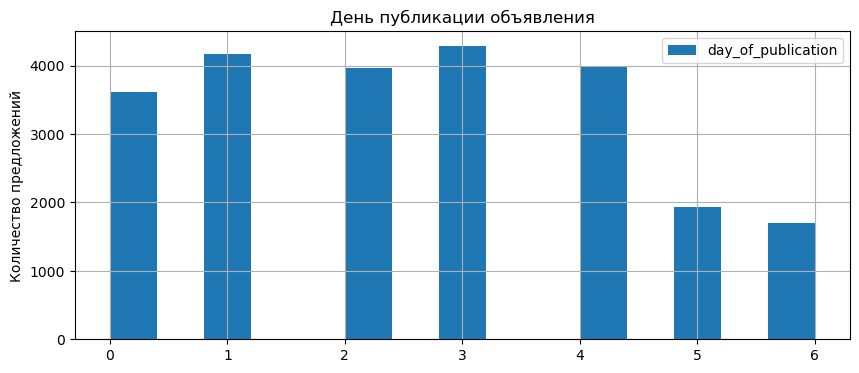

In [130]:
data.plot(kind='hist', title='День публикации объявления', \
          y='day_of_publication', bins=15, grid=True, figsize=(10,4))

plt.ylabel('Количество предложений')
plt.show()

 В основном объявления публиковались в будние дни. Возможно, это связанно с обращением собственников квартир к риелторским агенствам.

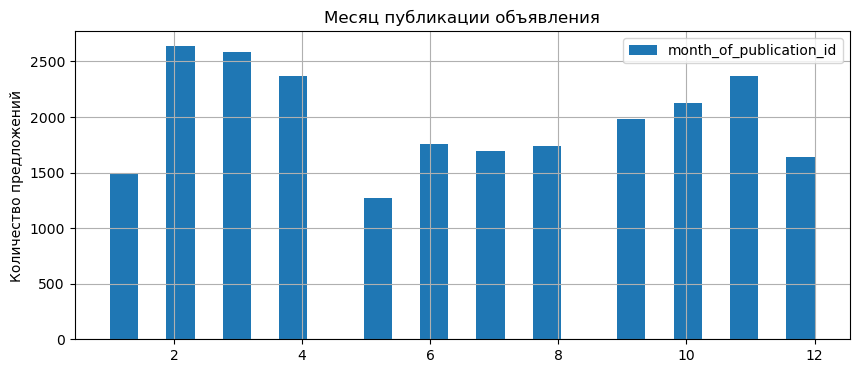

In [131]:
data.plot(kind='hist', title='Месяц публикации объявления', \
          y='month_of_publication_id', bins=25, grid=True, figsize=(10,4))

plt.ylabel('Количество предложений')
plt.show()

По графику видно, что пик размещения объявлений о продажах квартир приходится на весенние и осенние периоды. Но это не сильно выбивающиеся значения.

**Изучу, как быстро продавались квартиры по столбцу 'days_exposition'**

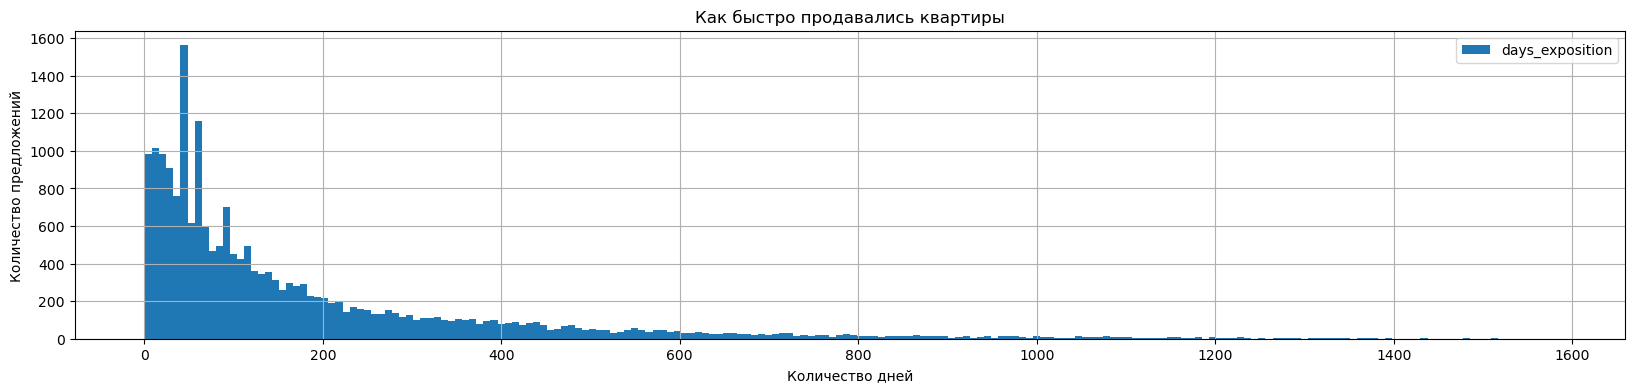

In [132]:
data.plot(kind='hist', title='Как быстро продавались квартиры', y='days_exposition', \
          bins=200, grid=True, figsize=(20,4))

plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.show()

График имеет правильную форму, без аномалий и выбросов с увеличением количечства дней.
Посчитаю среднее и медиану количества дней продажи квартир.

In [133]:
data['days_exposition'].mean()

180.7531998045921

In [134]:
data['days_exposition'].median()

95.0

In [135]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются в течении 180 дней. 
Медиана значительно меньше среднего значения. Очевидно, такой результать получился из-за долгопродающихся квартир.

Исходя из показаний на графике и вывода среднего и медианного значения количества дней продажи квартир, делаю вывод, что: Быстрыми, считаются те продажи, которые осуществлялись в первые 60-100 дней. Долгими продажами, можно назвать объявления, которые больше среднего значения - от 180 дней или на уровне показтеля последнего квартиля, т.е. 230 дней.

**Изучу факторы больше всего влияющие на общую(полную) стоимость объекта, по следующим параметрам:**

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

**Зависимость цены от общей площади**

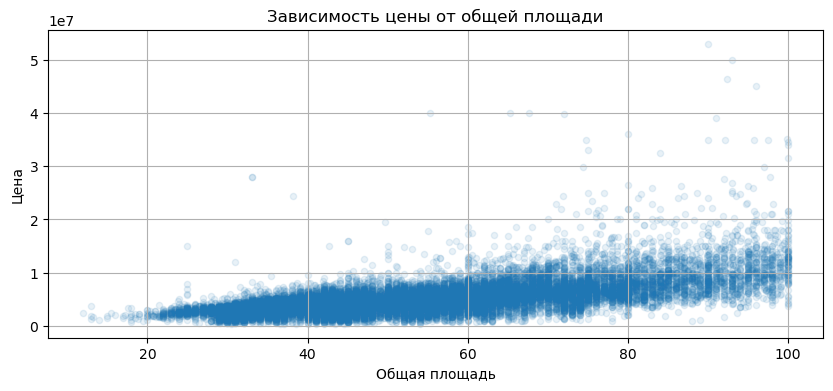

In [136]:
data_new_area_total.sort_values('total_area')\
.plot(x='total_area', y='last_price', \
      title='Зависимость цены от общей площади', \
      kind='scatter', alpha=0.1, figsize=(10,4), grid=True)

plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

Более "залитые цветом" места указывают на плотность объявлений в разных диапазонах общей площади. Высота точек, показывает цены. По графику виден плавный рост общей площади и повышения цены за квадратаж.

**Посмотрю на показатель коэффициента корреляции**

In [137]:
round(data_new_area_total['total_area'].corr(data['last_price']), 2)

0.65

Коэффициент имеет положительное значение, что подтверждает зависимость цены от общей площади.

**Зависимость цены от жилой площади**

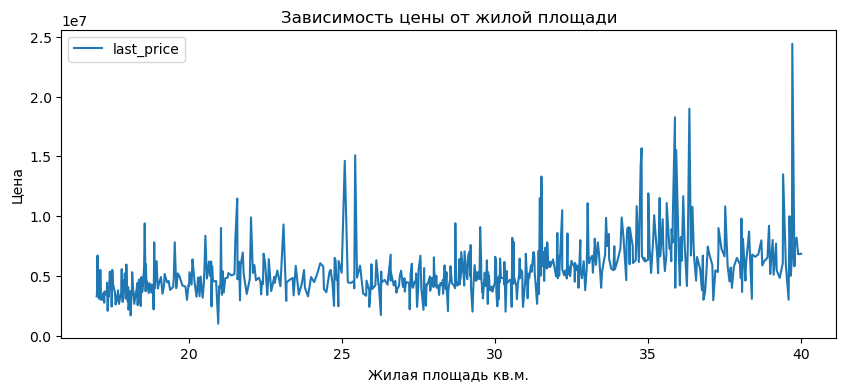

In [138]:
data_new_living_area.pivot_table(index='living_area', values='last_price', )\
.plot(title='Зависимость цены от жилой площади', figsize=(10,4))

plt.xlabel('Жилая площадь кв.м.')
plt.ylabel('Цена')
plt.show()

Построю диаграмму рассеяния зависимости цены от жилой площади.

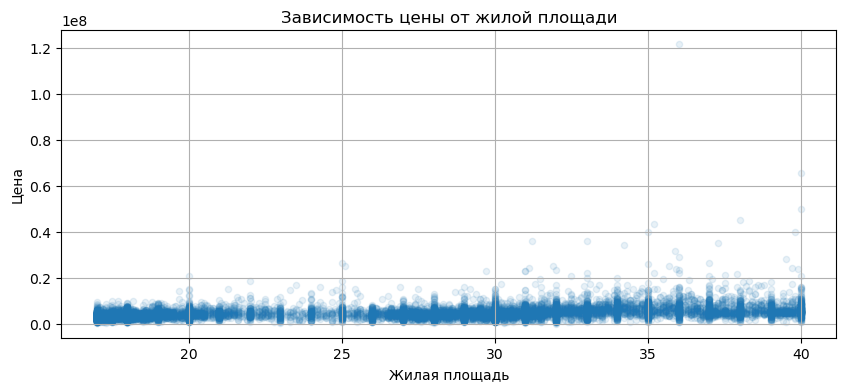

In [139]:
data_new_living_area.sort_values('living_area')\
.plot(x='living_area', y='last_price', \
      title='Зависимость цены от жилой площади', \
      kind='scatter', alpha=0.1, figsize=(10,4), grid=True)

plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

Получился наглядный график отображающий массив объявлений, а также показывающий некотороые выбивающиеся объявления. Так же на графике виден плавный и небольшой рост зависимости цены от жилой площади, что соответствует показателю коэффициента корреляции. По крайней мере, выглядит правдоподопно.

**Посмотрю на коэффициент корреляции**

In [140]:
round(data_new_living_area['living_area'].corr(data['last_price']), 2)

0.34

Коэффициент имеет положительное значение, хоть и меньшее, чем зависимость цены от общей площади. Но, все же, прослеживается в данном параметре прослеживается зависимость.

**Зависимость цены от площади кухни**

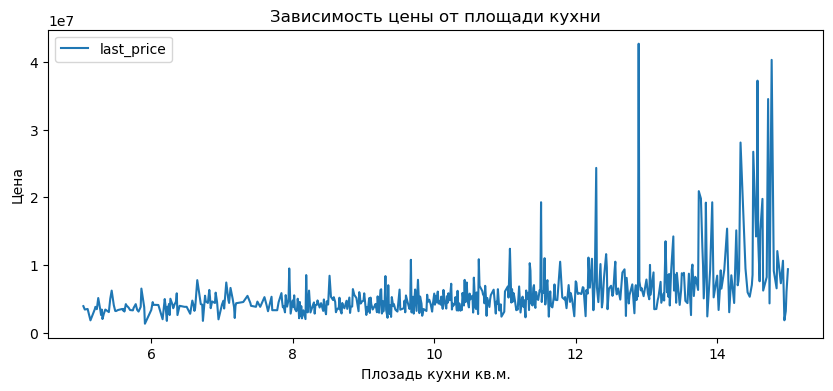

In [141]:
new_kitchen_area.pivot_table(index='kitchen_area', values='last_price')\
.plot(title='Зависимость цены от площади кухни', figsize=(10,4))

plt.xlabel('Плозадь кухни кв.м.')
plt.ylabel('Цена')
plt.show()

Построю диаграмму рассеяния зависимости цены от площади кухни.

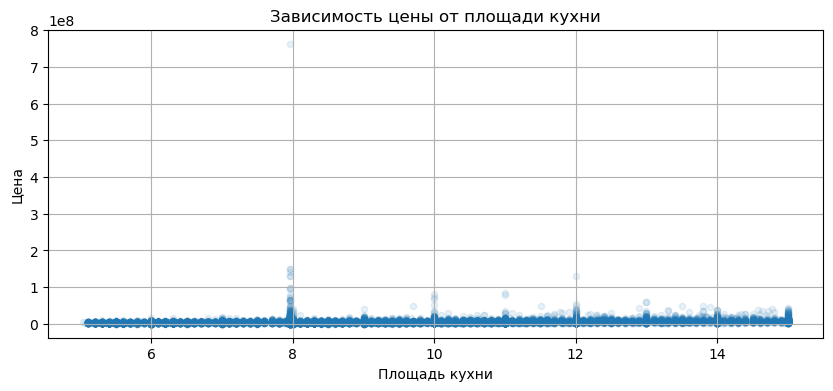

In [142]:
new_kitchen_area.sort_values('kitchen_area')\
.plot(x='kitchen_area', y='last_price', \
      title='Зависимость цены от площади кухни', \
      kind='scatter', alpha=0.1, figsize=(10,4), grid=True)

plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

Такая же ситуация, как и с соотношением с жилой площадью. Судя по графику присутствует незначительная зависимость, но все же она есть, и это подтверждает коэффициент корреляции.

**Посмотрю на коэффициент корреляции**

In [143]:
round(new_kitchen_area['kitchen_area'].corr(data['last_price']),2)

0.19

Коэффициент корреляция показывает слабую зависимость цены от площади кухни. Однако, по графику видно, что все же зависимость присутствует, особенно в диапазоне от 12 до 15 кв.м.

**Зависимость цены от количества комнат**

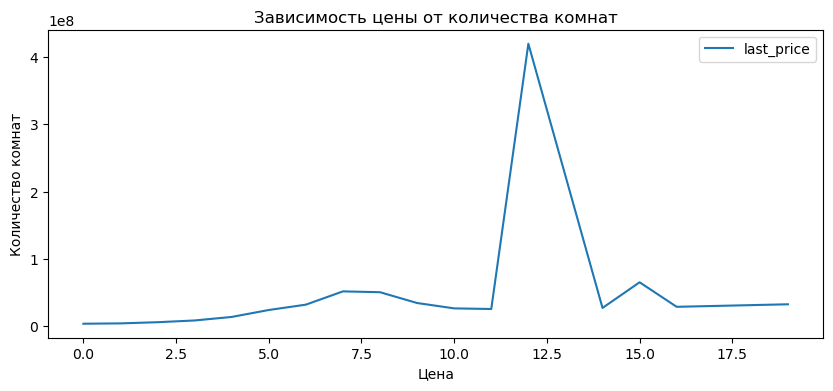

In [144]:
data.pivot_table(index='rooms', values='last_price')\
.plot(title='Зависимость цены от количества комнат', figsize=(10,4))

plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

**Посмотрю на коэффициент корреляции**

In [145]:
round(data['rooms'].corr(data['last_price']),2)

0.36

На графике виден выброс. Но в целом, можно сделать вывод, что есть зависимость цены от количества комнат. На это указывает и коэффициент корреляции.

**Тип этажа, на котором располоагается квартира**

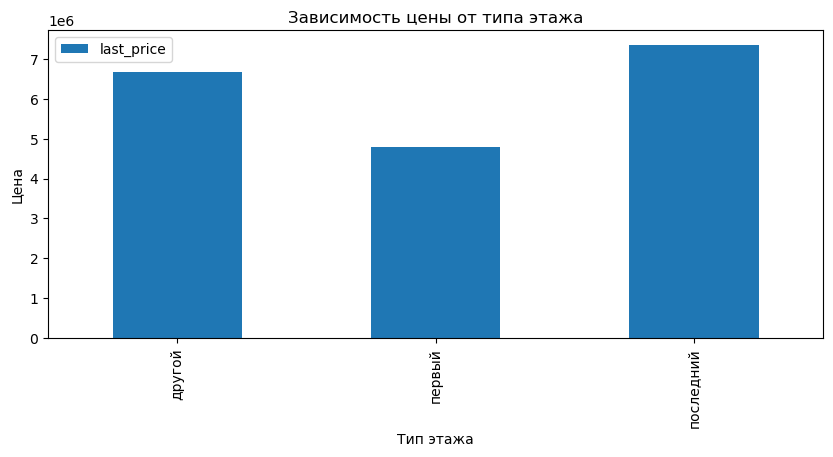

In [146]:
data.pivot_table(index='floors_type', values='last_price')\
.plot(title='Зависимость цены от типа этажа', figsize=(10,4), kind='bar')

plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

По графику видно, что квартиры на первом этаже стоят дешевле. Дороже всего стоят квартиры на последнем этаже.

Сгруппирую данные по медиане.

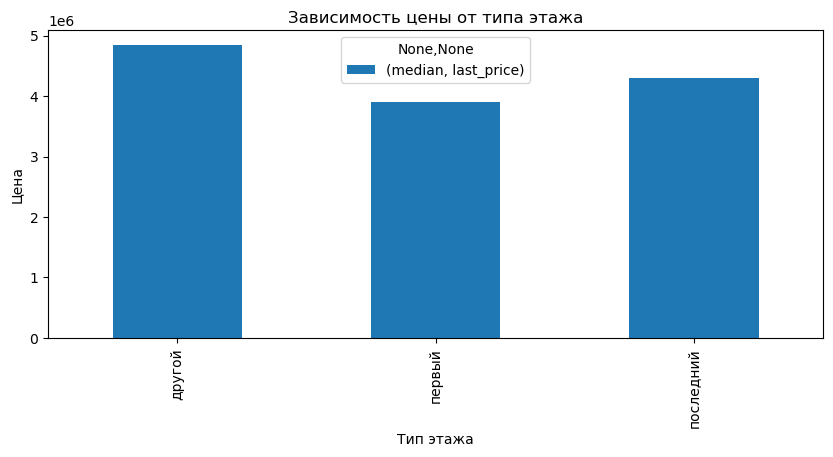

In [147]:
data.pivot_table(index='floors_type', values='last_price', aggfunc=['median'])\
.plot(title='Зависимость цены от типа этажа', figsize=(10,4), kind='bar')

plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Первый этаж также остался остающим по цене. Лидирующую позицию по зависимости цены от этажа заняли объявления, расположенные между первым и последним этажом.

**Зависимость цены от дня публикации объявления**

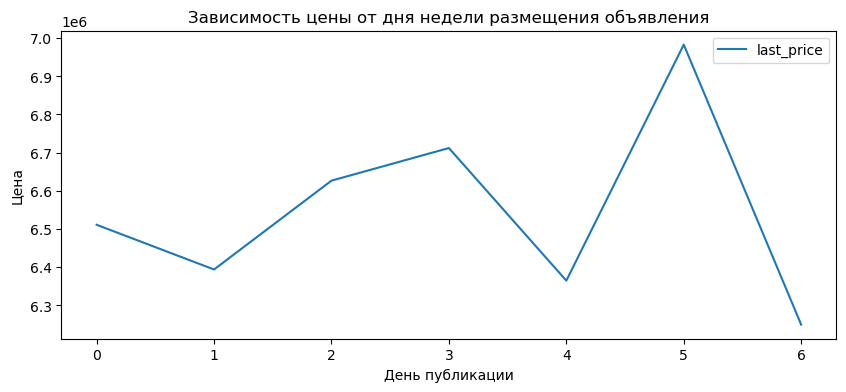

In [148]:
data.pivot_table(index='day_of_publication', values='last_price')\
.plot(title='Зависимость цены от дня недели размещения объявления', figsize=(10,4))

plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

**Посмотрю на коэффициент корреляции**

In [149]:
round(data['day_of_publication'].corr(data['last_price']),1)

0.0

По коэффициенту корреляции видно, что отсутствует зависимость размещения от дня недели.

**Зависимость цены от месяца публикации объявления**

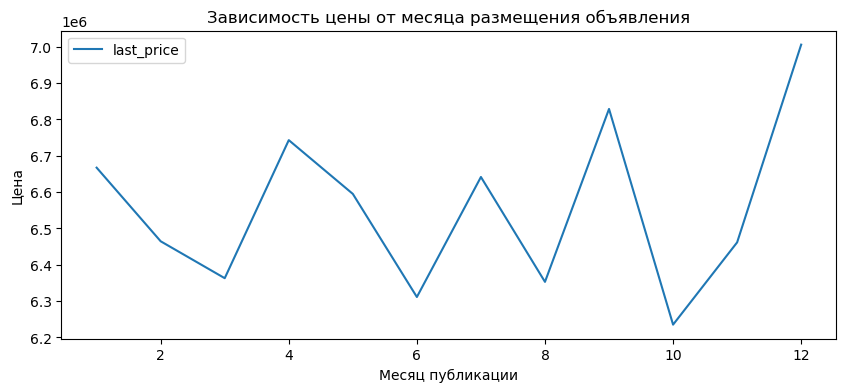

In [150]:
data.pivot_table(index='month_of_publication_id', values='last_price')\
.plot(title='Зависимость цены от месяца размещения объявления', figsize=(10,4))

plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()

**Посмотрю на коэффициент корреляции**

In [151]:
round(data['month_of_publication_id'].corr(data['last_price']),2)

0.0

Коэффициент корреляции показывает отсутствие зависимости. Однако ранее, я проследил, что продажа квартир имеет сезонный характер, который приходился на весенний и осенние периоды. Что также видно и на данном графике, который отображает скачки в продажах квартир.

**Зависимость цены от года публикации объявления**

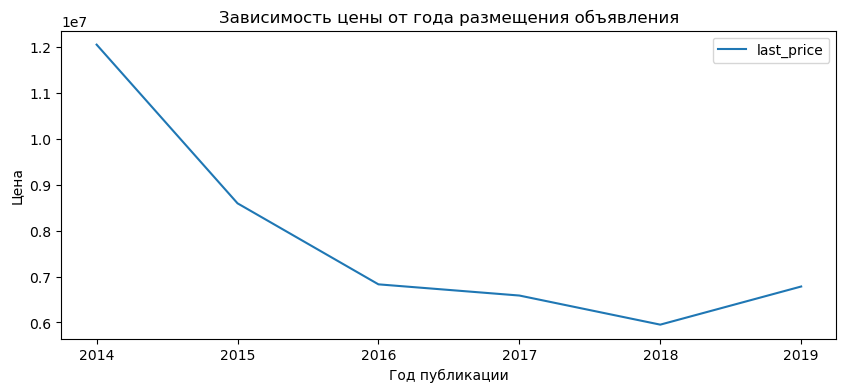

In [152]:
data.pivot_table(index='year_of_publication', values='last_price')\
.plot(title='Зависимость цены от года размещения объявления', figsize=(10,4))

plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()

**Посмотрим на коэффициент корреляции**

In [153]:
round(data['year_of_publication'].corr(data['last_price']),2)

-0.04

Коээфициент корреляции имеет отрицательное значение, что показывает отсутствие зависимости. На графике видно, что был равномерный и постепенный спад в цене на недвижимость до 2018 года, однако после, виднеется небольшой рост цен.

Рассмотрю динамику цены и площади продаваемых квартир. Возможно, упала не столько цена, сколько плозадь продаваемых квартир.

Построю график с динамикой площади продаваемых квартир и года публикации объявлений.

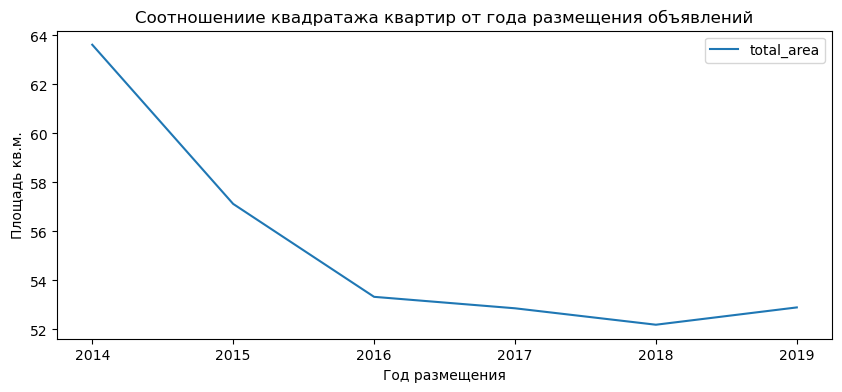

In [154]:
data_new_area_total.pivot_table(index='year_of_publication', values='total_area')\
.plot(title='Соотношениие квадратажа квартир от года размещения объявлений', figsize=(10,4))

plt.xlabel('Год размещения')
plt.ylabel('Площадь кв.м.')
plt.show()

Судя по графику соотношения квадратажа квартир от года размещения объявленй, прослеживается зависимость спада цены из-за уменьшения квадратажа квартир. В этом случае бизнес нельзя упрекнуть. Чем больше вместится квартир в утвержденные рамки проекта дома, тем больше выгоды получит застройщик.

**Посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [155]:
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

,count,mean
,last_price,last_price
locality_name,,
санкт-петербург,15721,8.062507e+06
пушкин,369,6.469036e+06
поселок парголово,327,4.488075e+06
деревня кудрово,472,4.358688e+06
поселок шушары,440,4.108082e+06
колпино,338,3.964021e+06
всеволожск,398,3.789068e+06
поселок мурино,590,3.678462e+06


Довольно ожидаемый результат. Подавляющее большинство квартир продается в Санкт-Петербурге. Логично, что и цена за квадратный метр в черте города больше, чем в пригороде. 

**Выделю квартиры и посчитаю среднюю цену каждого километра до центра города**

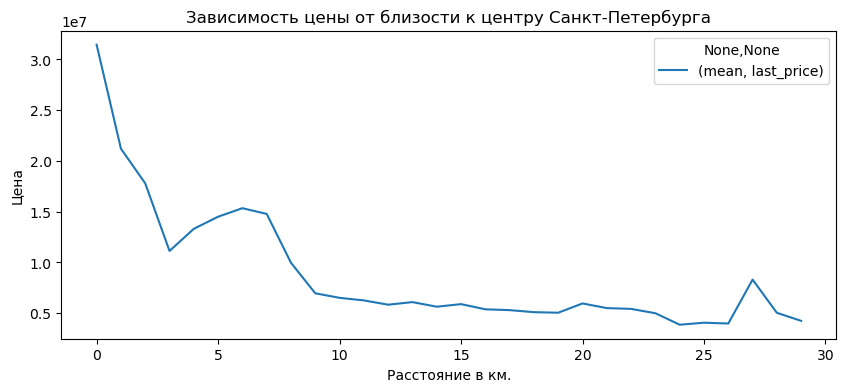

In [156]:
data[data['locality_name']=='санкт-петербург']\
.pivot_table(index='city_centers_distance_km', values=['last_price'], aggfunc=['mean'])\
.plot(title='Зависимость цены от близости к центру Санкт-Петербурга', figsize=(10,4))

plt.xlabel('Расстояние в км.')
plt.ylabel('Цена')
plt.show()

Прослеживается очевидная зависимость цены от близости расположения квартиры к центру города. На графике видно, что пиковые значения по цене присутствуют на расстоянии до 10 км от центра города. Если сравнивать с Москвой, то можно сказать, что данные квартиры расположенны внутри ТТК (расстояние от цетнтра Москвы до ТТК посмотрел по "Яндекс Картам"). Стоит заметить резкое снижение цены на квартиры расположенные в 3-4 км. от центра, также присутствует небольшой рост цен в районе 27 км. от центра.

### Общий вывод

Выполнена предобработка данных. Приведены к одному общему стилю столбца таблицы. Сделана оптимизация типов данных. Обработаны пропущенные значения.

Для обработки пропущенных значений, создал следующие переменные:

- **ceiling_height_median** - медианное значение высоты потолков; 
- **living_area_mean** - средняя жилая площадь;
- **kitchen_area_exchange** - среднее значение квадратажа кухни;
- **parks_nearest_mean** - среднее расстояние до ближайшего парка, превышающее 3000 м.

Устранены неявные дубликаты в названиях населенных пунктов, также все названия приведены к одному формату нижнего регистра.

Посчитаны и добавленны в таблицу следующие столбцы:

- **day_of_publication** - день публикации объявления;
- **month_of_publication** - месяц публикации объявления;
- **year_of_publication** - год публикации объявления;
- **square_price** - цена одного квадратного метра;
- **floors_type** - категорицазия по этажам (первый, последний, другой);
- **city_centeres_distance_km** - расстояние до центра города в км.

Для построения графиков и анализа данных, созданы следующие переменные с удаленными выбросами в данных, которые могли влиять на результат анализа:

- **new_kitchen_area** - удалены кухни, больше 15 кв.м.;
- **data_new_area_total** - отфильтрованны данные общей плозади квартир дол 100 кв.м.;
- **data_new_living_area** - отфильтрованные данные жилой площади квартир от 17 до 40 кв.м.;
- **data_last_price_filtered** - объявления до 6 млн.руб.;
- **data_new_ceiling_heaight** - отфильтрованные значения высоты потолков в диапазоне от 2.5 до 3 м.

**Выводы в исследовании:** 

Большая часть объявлений о продаже - это квартиры с общей площадью от 30 до 60 квадратных метров.

Большой массив обявлений квартир с жилой площадью от 17 до 40 кв.м.

В основном, кухни плозадью от 6 до 10 кв.м.

Средняя цена квартир от 6 млн.руб.

Большая часть квартир 1, 2-х и 3-х комнатные, что, вполне, логично.

Высота потолков имеет стандартный размен 2.6 - 2.7 м.

Основные продажи в старых 5-и этажках. Очевидно, что остальной массив объявлений приходится на многоэтажные и более современные дома.

Прогуглив расстояние от центра Санкт-Петербурга до КАДа, которое равняется около 16 км., сделал вывод, что, в основном, квартиры 
продаются ближе к окраине, но в пределах города, что так же может влиять на итоговуую стоимость квартиры.

Объявления, в основном, публикуются в будние дни. Возможно, это связанно с обращением собственников квартир к риелторским агенствам. Так же, это может служить хорошей информацией для продвижения объявлений в рекламных кампаниях.

**В ходе исследования, выявленны некоторые зависимости:**

Присутствует зависимость цены от общей площади, что подтверждает моложтельное значение коэффициента корреляции. Так же присутствует зависимость цены от жилой площади, площади кухни и количества комнат в квартире, что вполне логично.

Квартиры находящиеся на первом этаже, ниже квартир расположенных выше. Дороже всего квартиры стоят на последнем этаже. Не исключаю, чтоданных показатель исходит из того, что люди не хотят чтобы у них были соседи, хотя бы сверху. Плюс, чем выше расположена квартира, тем теоритически, лучше открывается вид на район проживания, что также играет свою раоль на итоговую стоимость.

Отсутствует зависимость цены от дня недели размещения объявления.

Я проследил, что продажа квартир имеет сезонный характер, который приходился на весенний и осенние периоды. Хотя коэффициент корреляции показывает нулевое значение, что говорит об отсутствии зависимости.

Что касается года размещения публикации, коээфициент корреляции имеет отрицательное значение, что показывает отсутствие зависимости. По графику видно, что был равномерный и постепенный спад в цене на недвижимость до 2018 года, однако после, виднеется небольшой рост цен.

Подавляющее большинство квартир продается в Санкт-Петербурге. Логично, что и цена за квадратный метр в черте города больше, чем в пригороде. 

Прослеживается очевидная зависимость цены от близости расположения квартиры к центру города. Пиковые значения по цене присутствуют на расстоянии до 10 км от центра города. Если сравнивать с Москвой, то можно сказать, что данные квартиры расположенны внутри ТТК (расстояние от цетнтра Москвы до ТТК посмотрел по "Яндекс Картам"). Стоит заметить резкое снижение цены на квартиры расположенные в 3-4 км. от центра, также присутствует небольшой рост цен в районе 27 км. от центра.